In [1]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import json
import pickle
import matplotlib.pyplot as plt

# Load DataSet

In [2]:
# Data Set Paths
SIMULATION_RESULTS_PATH = '../data/datasets/simulations/'

# First Dataset
FIRST_DATASET = pd.read_csv(f'{SIMULATION_RESULTS_PATH}Simulation_Lib_1.csv')
FIRST_DATASET = FIRST_DATASET.dropna().reset_index(drop=True)
FIRST_DATASET = FIRST_DATASET.drop(columns=['Theoretical_Resistance'])

# Second Dataset
SECOND_DATASET = pd.read_csv(f'{SIMULATION_RESULTS_PATH}Simulation_Lib_2.csv')
SECOND_DATASET = SECOND_DATASET.dropna().reset_index(drop=True)
SECOND_DATASET = SECOND_DATASET.drop(columns=['Theoretical_Resistance'])

# Third Dataset
THIRD_DATASET = pd.read_csv(f'{SIMULATION_RESULTS_PATH}Simulation_Lib_3.csv')
THIRD_DATASET = THIRD_DATASET.dropna().reset_index(drop=True)
THIRD_DATASET = THIRD_DATASET.drop(columns=['Theoretical_Resistance'])

# Fourth Dataset
FOURTH_DATASET = pd.read_csv(f'{SIMULATION_RESULTS_PATH}Simulation_Lib_4.csv')
FOURTH_DATASET = FOURTH_DATASET.dropna().reset_index(drop=True)
FOURTH_DATASET = FOURTH_DATASET.drop(columns=['Theoretical_Resistance'])

# Concatenate
#SIMULATION_RESULTS = pd.concat([FOURTH_DATASET], axis=0).reset_index(drop=True)
SIMULATION_RESULTS = pd.concat([FIRST_DATASET ,SECOND_DATASET, THIRD_DATASET, FOURTH_DATASET], axis=0).reset_index(drop=True)

WHOLE_DATA = SIMULATION_RESULTS.copy()
for row in range(len(WHOLE_DATA)):
    if WHOLE_DATA.loc[row, 'Corner'] == 0:
        WHOLE_DATA.loc[row, 'Fillet_Radius'] = 0

# take 1000 samples
WHOLE_DATA = WHOLE_DATA.sample(n=1000, random_state=42).reset_index(drop=True)

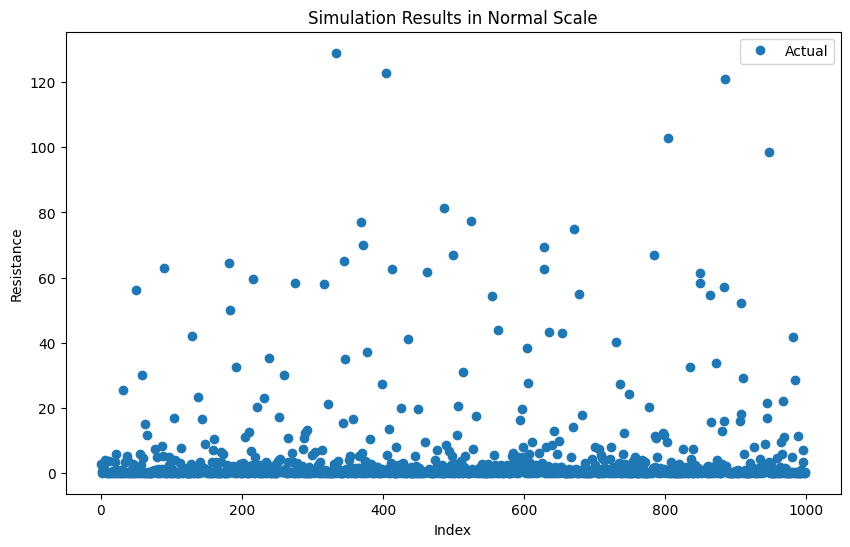

In [3]:
# Plot in Linear Scale
plt.figure(figsize=(10, 6))
plt.plot(WHOLE_DATA['Simulation_Resistance'].sample(frac=1, random_state=42).reset_index(drop=True), 'o', label='Actual')
plt.xlabel('Index')
plt.ylabel('Resistance')
plt.title('Simulation Results in Normal Scale')
plt.legend()
plt.show()

# LAZY PREDICT REGRESSION

In [4]:
FEATURE_DATA = np.array(WHOLE_DATA.iloc[:, 2:-3]).tolist()
TARGET = np.array(WHOLE_DATA.iloc[:, -1]).tolist()

COLUMN_NAMES = WHOLE_DATA.columns.tolist()
TARGET_NAMES = [COLUMN_NAMES[-1]]
FEATURE_NAMES = COLUMN_NAMES[2:-3]

# SAVE THE DATA AS JSON LIKE ABOVE
DATA_DICT = {
    'data': FEATURE_DATA,
    'target': TARGET,
    'frame': None,
    'target_names': TARGET_NAMES,
    'feature_names': FEATURE_NAMES
}

In [5]:
X, Y = shuffle(DATA_DICT['data'], DATA_DICT['target'], random_state=13)
X = np.array(X).astype(np.float32)
Y = np.array(Y).astype(np.float32)

OFFSET = int(len(X) * 0.9)

X_TRAIN, Y_TRAIN = X[:OFFSET], Y[:OFFSET]
X_TEST, Y_TEST = X[OFFSET:], Y[OFFSET:]

REG = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None, predictions=True)
SCORES, PREDICTIONS = REG.fit(X_TRAIN, X_TEST, Y_TRAIN, Y_TEST)

 98%|█████████▊| 41/42 [00:01<00:00, 21.55it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 7
[LightGBM] [Info] Start training from score 4.717163


100%|██████████| 42/42 [00:02<00:00, 18.10it/s]


In [6]:
SCORES

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,0.99,0.99,1.54,0.00
ExtraTreesRegressor,0.99,0.99,1.56,0.11
DecisionTreeRegressor,0.98,0.98,2.02,0.00
HistGradientBoostingRegressor,0.97,0.98,2.07,0.66
LGBMRegressor,0.97,0.97,2.18,0.36
GradientBoostingRegressor,0.96,0.96,2.62,0.12
XGBRegressor,0.94,0.95,3.08,0.17
RandomForestRegressor,0.94,0.95,3.12,0.20
BaggingRegressor,0.89,0.90,4.31,0.03


In [7]:
# Extract models
ALL_MODELS = REG.models

# FUNCTIONS FOR PLOTTING AND ERROR ANALYSIS

In [8]:
def predict_with_model(model, data_set, data_results):
        
    # Make predictions
    predictions = model.predict(data_set)
    
    # Calculate the error
    mean_squared_error = np.mean((predictions - data_results)**2)
    root_mean_squared_error = np.sqrt(mean_squared_error)
    mean_absolute_error = np.mean(np.abs(predictions - data_results))
    mean_absolute_percentage_error = np.mean(np.abs(predictions - data_results) / data_results)
    
    return predictions, mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [9]:
def plots_with_predictions(model_name,predictions, data_results):
    
    title = model_name + ' Model'
    
    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(data_results, 'o', label='Real Values')
    plt.plot(predictions, 'x', label='Predictions')
    plt.legend()
    plt.title(title)
    plt.xlabel('Data Index')
    plt.ylabel('Resistance')
    plt.show()
    
    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.plot(data_results, data_results, '-', label='Real Values')
    plt.plot(data_results, predictions, 'o', label='Predictions')
    plt.legend()
    plt.title(title)
    plt.xlabel('Real Resistance')
    plt.ylabel('Predicted Resistance')
    plt.show()
        

def plot_train_test_convergence(model,model_name, X, Y):
    
    # Train and test the model
    fraction_list = np.linspace(0.05, 0.95, 20)

    train_mean_abs_errors = []
    test_mean_abs_errors = []
    train_mean_squared_errors = []
    test_mean_squared_errors = []

    for fraction in fraction_list:

        offset = int(len(X) * fraction)

        x_train, y_train = X[:offset], Y[:offset]
        x_test, y_test = X[offset:], Y[offset:]

        model.fit(x_train, y_train)
        
        for [data_features, data_results] in [[x_train, y_train], [x_test, y_test]]:
            
            predictions, mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error = predict_with_model(model, data_features, data_results)
            
            if data_results is y_train:
                train_mean_abs_errors.append(mean_absolute_error)
                train_mean_squared_errors.append(mean_squared_error)
            else:
                test_mean_abs_errors.append(mean_absolute_error)
                test_mean_squared_errors.append(mean_squared_error)


    # Plot the results
    
    title_abs_error = model_name + ' Model Train and Test Mean Absolute Error Convergence'
    plt.figure(figsize=(10, 5))
    plt.plot(fraction_list, train_mean_abs_errors , 'o-', label='Train Error')
    plt.plot(fraction_list, test_mean_abs_errors, 'x-', label='Test Error')
    plt.legend()
    plt.title(title_abs_error)
    plt.xlabel('Fraction of Data')
    plt.ylabel('Mean Absolute Error')
    plt.show()   
    
    title_squared_error = model_name + ' Model Train and Test Mean Squared Error Convergence'
    plt.figure(figsize=(10, 5))
    plt.plot(fraction_list, train_mean_squared_errors , 'o-', label='Train Error')
    plt.plot(fraction_list, test_mean_squared_errors, 'x-', label='Test Error')
    plt.legend()
    plt.title(title_squared_error)
    plt.xlabel('Fraction of Data')
    plt.ylabel('Mean Squared Error')
    plt.show()

# PLOT FOR THE CHOSEN ONE MODEL

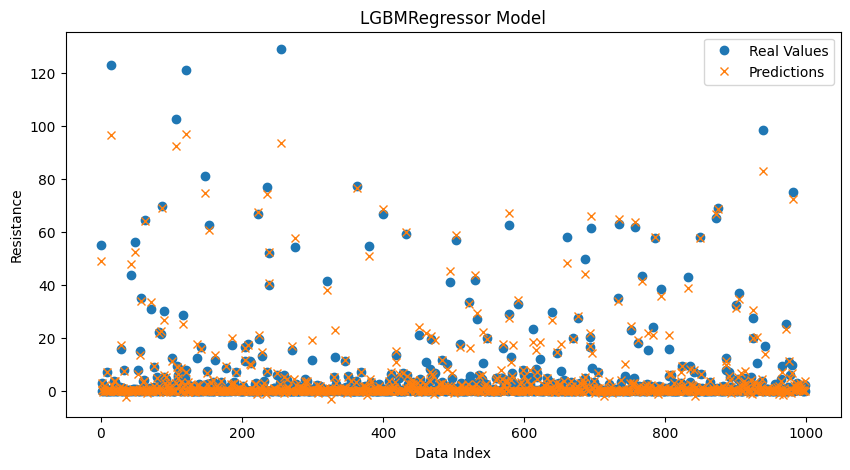

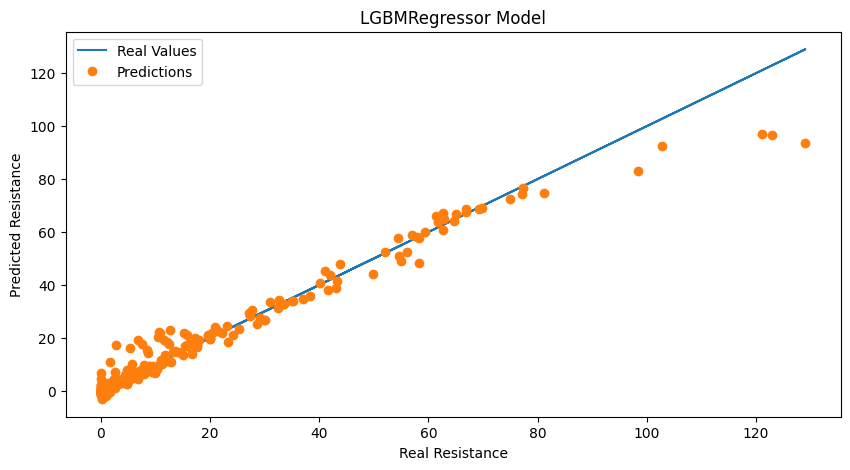

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 7
[LightGBM] [Info] Start training from score 6.610939
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

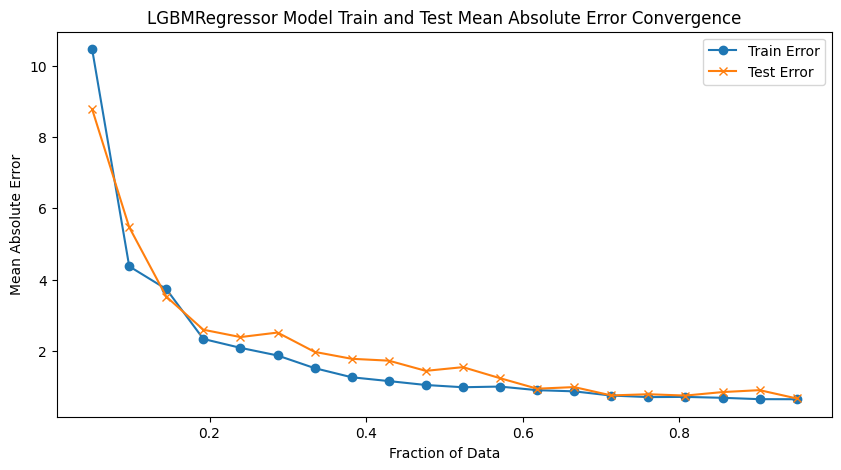

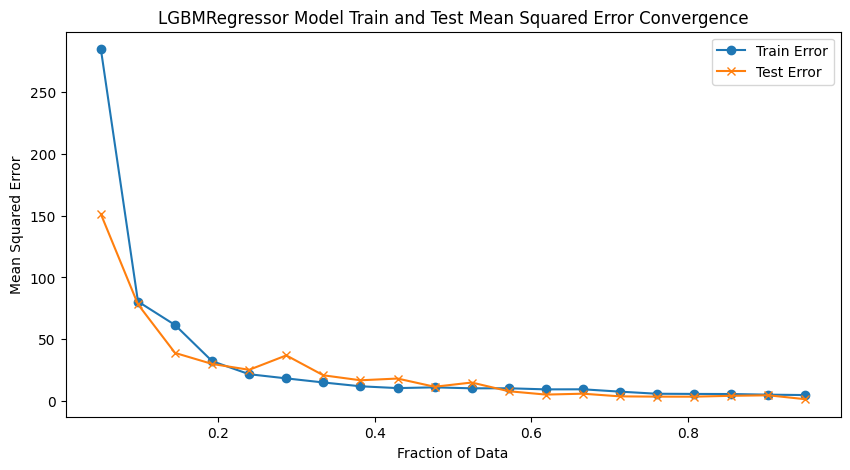

In [10]:
MODEL_NAME = 'LGBMRegressor'
MODEL = ALL_MODELS[MODEL_NAME]

PREDS, MSE, RMSE, MAE, MAPE = predict_with_model(MODEL, X, Y)
plots_with_predictions(MODEL_NAME, PREDS, Y)
plot_train_test_convergence(MODEL,MODEL_NAME, X, Y)

# ERROR ANALYSIS FOR ALL REGRESSION MODELS

In [11]:
MODELS_ERRORS_DF = pd.DataFrame(columns=['Model', 'Adjusted_R2', 'R2',
                                         'Train_RMSE', 'Test_RMSE',
                                         'Train_MAPE', 'Test_MAPE', 'Time_Taken'])

for model_name, model in ALL_MODELS.items():
    
    CUR_TRAIN_PREDICTIONS, CUR_TRAIN_MSE, CUR_TRAIN_RMSE, CUR_TRAIN_MAE, CUR_TRAIN_MAPE =\
        predict_with_model(model, X_TRAIN, Y_TRAIN)
    CUR_TEST_PREDICTIONS, CUR_TEST_MSE, CUR_TEST_RMSE, CUR_TEST_MAE, CUR_TEST_MAPE =\
        predict_with_model(model, X_TEST, Y_TEST)
    ADJ_R2 = SCORES.loc[model_name]['Adjusted R-Squared']
    R2 = SCORES.loc[model_name]['R-Squared']
    TIME_TAKEN = SCORES.loc[model_name]['Time Taken']
    
    MODELS_ERRORS_DF.loc[len(MODELS_ERRORS_DF)] = [model_name, ADJ_R2, R2, 
                                                   CUR_TRAIN_RMSE, CUR_TEST_RMSE,
                                                   CUR_TRAIN_MAPE, CUR_TEST_MAPE, TIME_TAKEN]
    
# sort Adjusted_R2, RMSE
MODELS_ERRORS_DF = MODELS_ERRORS_DF.sort_values(by=['Adjusted_R2', 'Train_RMSE', 'Test_RMSE', 'Time_Taken'], ascending=False)
MODELS_ERRORS_DF.reset_index(drop=True, inplace=True)
MODELS_ERRORS_DF

,Model,Adjusted_R2,R2,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE,Time_Taken
0,ExtraTreeRegressor,0.99,0.99,0.85,1.54,0.04,0.28,0.00
1,ExtraTreesRegressor,0.99,0.99,0.62,1.63,0.09,1.42,0.11
2,DecisionTreeRegressor,0.98,0.98,0.36,5.10,0.01,0.30,0.00
3,HistGradientBoostingRegressor,0.97,0.98,2.36,2.09,3.93,5.61,0.66
4,LGBMRegressor,0.97,0.97,2.25,1.57,3.50,3.37,0.36
5,GradientBoostingRegressor,0.96,0.96,0.84,2.60,7.96,14.17,0.12
6,XGBRegressor,0.94,0.95,0.60,1.09,1.01,1.56,0.17
7,RandomForestRegressor,0.94,0.95,1.08,3.43,0.17,0.45,0.20
8,BaggingRegressor,0.89,0.90,1.59,4.30,0.22,0.52,0.03
9,AdaBoostRegressor,0.75,0.77,5.17,6.71,401.00,571.38,0.05


# SELECT THE BEST REGRESSION MODELS AND CALCULATE THE TRAIN AND TEST ERRORS FOR EACH MODEL

In [12]:
# Find predictions for the models that have larger than 0.9 Adjusted R2 
CHOSEN_MODELS = MODELS_ERRORS_DF[MODELS_ERRORS_DF['Adjusted_R2'] > 0.9]

# FIND THE DIFFERENCE BETWEEN THE PREDICTED VALUES AND THE REAL VALUES FOR EACH MODEL BY USING DICT
OFFSET = int(len(X) * 0.9)
X_TRAIN, Y_TRAIN = X[:OFFSET], Y[:OFFSET]

DIFF_TRAIN_DICT = {}
DIFF_TEST_DICT = {}


for NAME in CHOSEN_MODELS['Model']:
    model = ALL_MODELS[NAME]
    predictions_train = model.predict(X_TRAIN)
    diff_train = np.abs(predictions_train - Y_TRAIN)
    DIFF_TRAIN_DICT[NAME] = diff_train
       
    predictions_test = model.predict(X_TEST)
    diff_test = np.abs(predictions_test - Y_TEST)
    DIFF_TEST_DICT[NAME] = diff_test
    
    
DIFF_TRAIN_DICT = pd.DataFrame(DIFF_TRAIN_DICT)
DIFF_TEST_DICT = pd.DataFrame(DIFF_TEST_DICT)

DIFF_TRAIN_DICT

,ExtraTreeRegressor,ExtraTreesRegressor,DecisionTreeRegressor,HistGradientBoostingRegressor,LGBMRegressor,GradientBoostingRegressor,XGBRegressor,RandomForestRegressor
0,0.00,1.06,0.00,5.30,7.97,1.52,0.35,14.24
1,0.00,0.06,0.00,0.18,0.35,0.70,0.11,0.07
2,0.00,0.00,0.00,0.04,0.03,0.09,0.02,0.00
3,0.00,0.00,0.00,0.66,0.90,0.71,0.01,0.01
4,0.02,0.00,0.00,0.03,0.16,0.19,0.23,0.06
...,...,...,...,...,...,...,...,...
895,0.00,0.01,0.00,0.03,0.68,0.12,0.02,0.20
896,0.00,0.00,0.00,0.00,0.03,0.08,0.00,0.00
897,0.00,0.00,0.00,0.01,0.01,0.07,0.03,0.00
898,0.00,0.04,0.00,0.13,0.00,0.10,0.06,0.08


In [13]:
DIFF_TEST_DICT

,ExtraTreeRegressor,ExtraTreesRegressor,DecisionTreeRegressor,HistGradientBoostingRegressor,LGBMRegressor,GradientBoostingRegressor,XGBRegressor,RandomForestRegressor
0,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00
1,9.11,0.36,2.65,3.45,1.57,2.63,0.22,2.35
2,0.00,0.00,0.00,0.00,0.00,0.06,0.04,0.00
3,0.00,0.02,0.07,0.03,0.09,0.34,0.06,0.05
4,2.90,0.16,2.90,0.84,0.33,0.22,0.33,0.73
...,...,...,...,...,...,...,...,...
95,0.01,0.01,0.01,0.03,0.00,0.09,0.03,0.00
96,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00
97,0.10,0.16,0.10,0.05,0.08,0.47,0.01,0.18
98,0.14,0.20,0.14,1.83,1.44,2.05,1.15,0.81


# FIND THE BEST MODEL THAT HAS THE MINIMUM ERROR FOR EACH DATA

In [14]:
# Find the min difference for each value with for loop
MIN_DIFF_TRAIN = []
MIN_DIFF_TRAIN_MODEL = []

MIN_DIFF_TEST = []
MIN_DIFF_TEST_MODEL = []

THRESHOLD = 0.02 # Store the models that have less than 0.1 difference with the real value and choose the highest rank in
# the MODELS_ERRORS_DF

for index in range(len(DIFF_TRAIN_DICT)):
    
    # If there are models their difference is less than the threshold, choose the one with the highest rank in MODELS_ERRORS_DF
    if (DIFF_TRAIN_DICT.iloc[index] < THRESHOLD).any():
        # Choose the highest rank model in MODELS_ERRORS_DF
        # find the models that have less than 0.1 difference with the real value
        threshold_models: list[tuple[str, int]] = []
        for model_name in DIFF_TRAIN_DICT.iloc[index][DIFF_TRAIN_DICT.iloc[index] < THRESHOLD].index:
            rank_of_model = MODELS_ERRORS_DF[MODELS_ERRORS_DF['Model'] == model_name].index[0]
            threshold_models.append((model_name, rank_of_model))
            
        # Choose the model with the lowest rank
        min_diff_model = min(threshold_models, key=lambda x: x[1])[0]
        min_diff = DIFF_TRAIN_DICT.iloc[index][min_diff_model]
    else:
        min_diff = DIFF_TRAIN_DICT.iloc[index].min()
        min_diff_model = DIFF_TRAIN_DICT.iloc[index].idxmin()
    
    MIN_DIFF_TRAIN.append(min_diff)
    MIN_DIFF_TRAIN_MODEL.append(min_diff_model)

for index in range(len(DIFF_TEST_DICT)):
    
    # If there are models their difference is less than the threshold, choose the one with the highest rank in MODELS_ERRORS_DF
    if (DIFF_TEST_DICT.iloc[index] < THRESHOLD).any():
        # Choose the highest rank model in MODELS_ERRORS_DF
        # find the models that have less than 0.1 difference with the real value
        threshold_models: list[tuple[str, int]] = []
        for model_name in DIFF_TEST_DICT.iloc[index][DIFF_TEST_DICT.iloc[index] < THRESHOLD].index:
            rank_of_model = MODELS_ERRORS_DF[MODELS_ERRORS_DF['Model'] == model_name].index[0]
            threshold_models.append((model_name, rank_of_model))
            
        # Choose the model with the lowest rank
        min_diff_model = min(threshold_models, key=lambda x: x[1])[0]
        min_diff = DIFF_TEST_DICT.iloc[index][min_diff_model]
    else:
        min_diff = DIFF_TEST_DICT.iloc[index].min()
        min_diff_model = DIFF_TEST_DICT.iloc[index].idxmin()
    
    MIN_DIFF_TEST.append(min_diff)
    MIN_DIFF_TEST_MODEL.append(min_diff_model)    

# Add the min difference and the model name to the data frame
DIFF_TRAIN_DICT['Min_Diff'] = MIN_DIFF_TRAIN
DIFF_TRAIN_DICT['Best_Model'] = MIN_DIFF_TRAIN_MODEL

DIFF_TEST_DICT['Min_Diff'] = MIN_DIFF_TEST
DIFF_TEST_DICT['Best_Model'] = MIN_DIFF_TEST_MODEL

DIFF_TRAIN_DICT

,ExtraTreeRegressor,ExtraTreesRegressor,DecisionTreeRegressor,HistGradientBoostingRegressor,LGBMRegressor,GradientBoostingRegressor,XGBRegressor,RandomForestRegressor,Min_Diff,Best_Model
0,0.00,1.06,0.00,5.30,7.97,1.52,0.35,14.24,0.00,ExtraTreeRegressor
1,0.00,0.06,0.00,0.18,0.35,0.70,0.11,0.07,0.00,ExtraTreeRegressor
2,0.00,0.00,0.00,0.04,0.03,0.09,0.02,0.00,0.00,ExtraTreeRegressor
3,0.00,0.00,0.00,0.66,0.90,0.71,0.01,0.01,0.00,ExtraTreeRegressor
4,0.02,0.00,0.00,0.03,0.16,0.19,0.23,0.06,0.02,ExtraTreeRegressor
...,...,...,...,...,...,...,...,...,...,...
895,0.00,0.01,0.00,0.03,0.68,0.12,0.02,0.20,0.00,ExtraTreeRegressor
896,0.00,0.00,0.00,0.00,0.03,0.08,0.00,0.00,0.00,ExtraTreeRegressor
897,0.00,0.00,0.00,0.01,0.01,0.07,0.03,0.00,0.00,ExtraTreeRegressor
898,0.00,0.04,0.00,0.13,0.00,0.10,0.06,0.08,0.00,ExtraTreeRegressor


In [15]:
DIFF_TEST_DICT

,ExtraTreeRegressor,ExtraTreesRegressor,DecisionTreeRegressor,HistGradientBoostingRegressor,LGBMRegressor,GradientBoostingRegressor,XGBRegressor,RandomForestRegressor,Min_Diff,Best_Model
0,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,ExtraTreeRegressor
1,9.11,0.36,2.65,3.45,1.57,2.63,0.22,2.35,0.22,XGBRegressor
2,0.00,0.00,0.00,0.00,0.00,0.06,0.04,0.00,0.00,ExtraTreeRegressor
3,0.00,0.02,0.07,0.03,0.09,0.34,0.06,0.05,0.00,ExtraTreeRegressor
4,2.90,0.16,2.90,0.84,0.33,0.22,0.33,0.73,0.16,ExtraTreesRegressor
...,...,...,...,...,...,...,...,...,...,...
95,0.01,0.01,0.01,0.03,0.00,0.09,0.03,0.00,0.01,ExtraTreeRegressor
96,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,ExtraTreeRegressor
97,0.10,0.16,0.10,0.05,0.08,0.47,0.01,0.18,0.01,XGBRegressor
98,0.14,0.20,0.14,1.83,1.44,2.05,1.15,0.81,0.14,ExtraTreeRegressor


In [16]:
# Count how many times each model is chosen
CHOSEN_MODEL_COUNT = DIFF_TRAIN_DICT['Best_Model'].value_counts()
CHOSEN_MODEL_COUNT

Best_Model
ExtraTreeRegressor       854
DecisionTreeRegressor     25
ExtraTreesRegressor       20
XGBRegressor               1
Name: count, dtype: int64

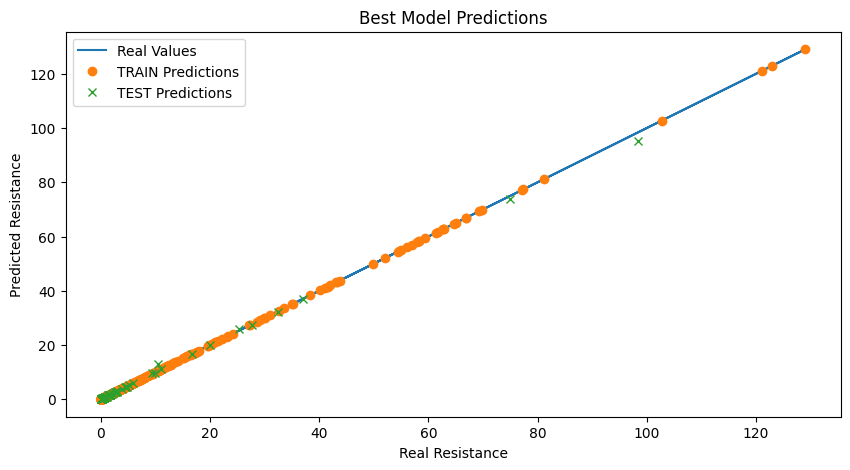

In [17]:
# Find the corresponding values for each train data with best model that has the minimum difference
BEST_TRAIN_MODEL = DIFF_TRAIN_DICT['Best_Model']
BEST_TEST_MODEL = DIFF_TEST_DICT['Best_Model']

BEST_TRAIN_MODEL_PREDICTIONS = np.zeros(len(X_TRAIN))
BEST_TEST_MODEL_PREDICTIONS = np.zeros(len(X_TEST))
for index, model_name in enumerate(BEST_TRAIN_MODEL):
    model = ALL_MODELS[model_name]
    prediction = model.predict([X_TRAIN[index]])
    BEST_TRAIN_MODEL_PREDICTIONS[index] = prediction

for index, model_name in enumerate(BEST_TEST_MODEL):
    model = ALL_MODELS[model_name]
    prediction = model.predict([X_TEST[index]])
    BEST_TEST_MODEL_PREDICTIONS[index] = prediction

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(Y_TRAIN, Y_TRAIN, '-', label='Real Values')
plt.plot(Y_TRAIN, BEST_TRAIN_MODEL_PREDICTIONS, 'o', label='TRAIN Predictions')
plt.plot(Y_TEST, BEST_TEST_MODEL_PREDICTIONS, 'x', label='TEST Predictions')
plt.legend()
plt.title('Best Model Predictions')
plt.xlabel('Real Resistance')
plt.ylabel('Predicted Resistance')
plt.show()

In [18]:
# Convert the X Train Data to a DataFrame
CLASSIFICATION_TRAIN_DF = pd.DataFrame(X_TRAIN, columns=FEATURE_NAMES)
CLASSIFICATION_TRAIN_DF['Best_Model'] = BEST_TRAIN_MODEL

CLASSIFICATION_TEST_DF = pd.DataFrame(X_TEST, columns=FEATURE_NAMES)
CLASSIFICATION_TEST_DF['Best_Model'] = BEST_TEST_MODEL

CLASSIFICATION_TRAIN_DF

,Step_Size,Side_Length,Total_Length,Corner,Width,Height,Fillet_Radius,Best_Model
0,0.50,16.50,87.50,102.00,0.05,0.05,0.04,ExtraTreeRegressor
1,1.75,14.00,31.50,12.00,0.21,0.04,0.18,ExtraTreeRegressor
2,0.50,5.00,19.00,24.00,0.12,0.31,0.11,ExtraTreeRegressor
3,1.50,15.00,72.00,28.00,0.22,0.44,0.14,ExtraTreeRegressor
4,0.50,5.00,12.00,14.00,0.21,0.04,0.16,ExtraTreeRegressor
...,...,...,...,...,...,...,...,...
895,0.50,18.50,71.50,90.00,0.25,0.15,0.16,ExtraTreeRegressor
896,0.50,8.00,8.00,0.00,0.25,0.25,0.00,ExtraTreeRegressor
897,2.00,6.00,10.00,4.00,0.81,0.31,0.71,ExtraTreeRegressor
898,1.00,19.00,47.00,32.00,0.25,0.10,0.16,ExtraTreeRegressor


In [19]:
CLASSIFICATION_TEST_DF

,Step_Size,Side_Length,Total_Length,Corner,Width,Height,Fillet_Radius,Best_Model
0,1.00,6.00,8.00,4.00,0.41,0.31,0.25,ExtraTreeRegressor
1,1.50,15.00,21.00,8.00,0.04,0.04,0.03,XGBRegressor
2,1.50,12.00,27.00,10.00,0.61,0.31,0.38,ExtraTreeRegressor
3,0.50,3.50,5.50,6.00,0.08,0.31,0.07,ExtraTreeRegressor
4,0.50,34.50,34.50,0.00,0.15,0.05,0.00,ExtraTreesRegressor
...,...,...,...,...,...,...,...,...
95,1.00,6.00,8.00,4.00,0.13,0.31,0.10,ExtraTreeRegressor
96,1.00,11.00,23.00,10.00,0.38,0.28,0.24,ExtraTreeRegressor
97,1.00,17.00,29.00,20.00,0.25,0.10,0.16,XGBRegressor
98,0.50,16.50,36.50,44.00,0.25,0.05,0.16,ExtraTreeRegressor


# LAZY PREDICT CLASSIFICATION

In [20]:
# Classification of Best Model with Lazy Classifier
from lazypredict.Supervised import LazyClassifier

FEATURE_CLASS_DATA = np.array(CLASSIFICATION_TRAIN_DF.iloc[:, :-1]).tolist()
TARGET_CLASS = np.array(CLASSIFICATION_TRAIN_DF.iloc[:, -1]).tolist()

COLUMN_CLASS_NAMES = CLASSIFICATION_TRAIN_DF.columns.tolist()
TARGET_CLASS_NAMES = [COLUMN_NAMES[-1]]
FEATURE_CLASS_NAMES = COLUMN_NAMES[2:-3]

# SAVE THE DATA AS JSON LIKE ABOVE
DATA_CLASS_DICT = {
    'data': FEATURE_DATA,
    'target': TARGET,
    'frame': None,
    'target_names': TARGET_NAMES,
    'feature_names': FEATURE_NAMES
}

In [21]:
X, Y = shuffle(DATA_CLASS_DICT['data'], DATA_DICT['target'], random_state=13)
X = np.array(X).astype(np.float32)


X_CLASS_TRAIN, Y_CLASS_TRAIN = CLASSIFICATION_TRAIN_DF.iloc[:, :-1], CLASSIFICATION_TRAIN_DF.iloc[:, -1]
X_CLASS_TEST, Y_CLASS_TEST = CLASSIFICATION_TEST_DF.iloc[:, :-1], CLASSIFICATION_TEST_DF.iloc[:, -1]

CLASSIFIER = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None, predictions=True)
SCORES_CLASS, PREDICTIONS_CLASS = CLASSIFIER.fit(X_CLASS_TRAIN, X_CLASS_TEST, Y_CLASS_TRAIN, Y_CLASS_TEST)

 45%|████▌     | 14/31 [00:00<00:00, 68.45it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier
could not convert string to float: 'ExtraTreeRegressor'
ROC AUC couldn't be calculated for BaggingClassifier
could not convert string to float: 'ExtraTreeRegressor'
ROC AUC couldn't be calculated for BernoulliNB
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for CalibratedClassifierCV
could not convert string to float: 'ExtraTreeRegressor'
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
ROC AUC couldn't be calculated for DecisionTreeClassifier
could not convert string to float: 'ExtraTreeRegressor'
ROC AUC couldn't be calculated for DummyClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for ExtraTreeClassifier
could not convert string to float: 'ExtraTreeRegressor'
ROC AUC co

 74%|███████▍  | 23/31 [00:00<00:00, 71.84it/s]

QuadraticDiscriminantAnalysis model failed to execute
y has only 1 sample in class XGBRegressor, covariance is ill defined.
ROC AUC couldn't be calculated for RandomForestClassifier
could not convert string to float: 'ExtraTreeRegressor'
ROC AUC couldn't be calculated for RidgeClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for RidgeClassifierCV
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for SGDClassifier
dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.
ROC AUC couldn't be calculated for SVC
could not convert string to float: 'ExtraTreeRegressor'
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
TunedThresholdClassifierCV mode

100%|██████████| 31/31 [00:01<00:00, 25.95it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [22]:
SCORES_CLASS

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.48,0.16,None,0.34,0.01
LabelSpreading,0.48,0.16,None,0.34,0.02
DecisionTreeClassifier,0.45,0.15,None,0.32,0.00
ExtraTreesClassifier,0.46,0.14,None,0.31,0.05
BaggingClassifier,0.46,0.14,None,0.31,0.02
Perceptron,0.45,0.14,None,0.29,0.00
PassiveAggressiveClassifier,0.45,0.14,None,0.29,0.01
GaussianNB,0.43,0.13,None,0.29,0.00
RandomForestClassifier,0.45,0.13,None,0.29,0.07


In [23]:
PREDICTIONS_CLASS['TRUE MODEL'] = Y_CLASS_TEST
PREDICTIONS_CLASS

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,CalibratedClassifierCV,DecisionTreeClassifier,DummyClassifier,ExtraTreeClassifier,ExtraTreesClassifier,GaussianNB,KNeighborsClassifier,...,NearestCentroid,PassiveAggressiveClassifier,Perceptron,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,LGBMClassifier,TRUE MODEL
0,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,...,ExtraTreesRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor
1,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,...,DecisionTreeRegressor,DecisionTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,XGBRegressor
2,ExtraTreesRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,...,ExtraTreesRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor
3,ExtraTreesRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreesRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,...,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreesRegressor,ExtraTreeRegressor
4,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,...,DecisionTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreesRegressor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,...,ExtraTreesRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor
96,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,...,ExtraTreesRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor
97,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,...,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,XGBRegressor
98,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,...,DecisionTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor,ExtraTreeRegressor


# SELECT THE BEST CLASSIFICATION MODEL

In [24]:
# Choose the best model which has a higher accuracy
SCORES_CLASS_DF = pd.DataFrame(SCORES_CLASS)
BEST_CLASS_MODEL = SCORES_CLASS_DF[SCORES_CLASS_DF['Accuracy'] == SCORES_CLASS_DF['Accuracy'].max()].index[0]
BEST_CLASS = CLASSIFIER.models[BEST_CLASS_MODEL]
BEST_CLASS

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Step_Size', 'Side_Length', 'Total_Length', 'Corner', 'Width', 'Height',
       'Fillet_Radius'],
      dtype='object')),
                                                 ('categorical_low',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object')),
                                                 ('categorical_high',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OrdinalEncoder())]),
                                                  Index([], dtype='object'))])),
                ('classifier', LabelPropagation())])

In [25]:
# Save the best classification model
# pickle.dump(BEST_CLASS, open('best_classification_model.pkl', 'wb'))

In [26]:
# Save the best regression models
BEST_REGRESSION_MODELS = MODELS_ERRORS_DF[MODELS_ERRORS_DF['Model'].isin(DIFF_TRAIN_DICT['Best_Model'])]
BEST_REGRESSION_MODELS

,Model,Adjusted_R2,R2,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE,Time_Taken
0,ExtraTreeRegressor,0.99,0.99,0.85,1.54,0.04,0.28,0.00
1,ExtraTreesRegressor,0.99,0.99,0.62,1.63,0.09,1.42,0.11
2,DecisionTreeRegressor,0.98,0.98,0.36,5.10,0.01,0.30,0.00
6,XGBRegressor,0.94,0.95,0.60,1.09,1.01,1.56,0.17


# CALL THE BEST CLASSIFICATION MODEL AND THE BEST REGRESSION MODEL TO MAKE PREDICTIONS

In [27]:
# Call the best classification model and the best regression models and make predictions
LOADED_CLASS_MODEL = pickle.load(open('best_classification_model.pkl', 'rb'))

# Example Prediction List
Step_Size = 1.5  # (mm)  
Side_Length = 10   # (mm)
Total_Length = 40  # (mm)
Corner = 20  # 0 < Corner (mm) 
Width = 0.05  # 0.05 < Width (mm)
Height = 0.05  # 0.05 < Height (mm)
Fillet_Radius = 0.05  # width/2 < Fillet_Radius < Width   (mm)

prediction_list = [Step_Size, Side_Length, Total_Length, Corner, Width, Height, Fillet_Radius]
df_prediction = pd.DataFrame([prediction_list], columns=FEATURE_NAMES)

# Classification Prediction
MODEL_PREDICTION = LOADED_CLASS_MODEL.predict(df_prediction)
NAME_MODEL_PREDICTION = str(MODEL_PREDICTION[0])

# Regression Predictions
BEST_REG_MODEL = MODELS_ERRORS_DF[MODELS_ERRORS_DF['Model'] == NAME_MODEL_PREDICTION]['Model'].values[0]

# Make the prediction with the best regression model
BEST_REGRESSION = ALL_MODELS[BEST_REG_MODEL]
RESISTANCE_PREDICTION = BEST_REGRESSION.predict(df_prediction)
print(f'The resistance value is {RESISTANCE_PREDICTION[0]} with the model {BEST_REG_MODEL}')

FileNotFoundError: [Errno 2] No such file or directory: 'best_classification_model.pkl'